In [38]:
library(ggseqlogo)
library(ggplot2)
library(patchwork)

In [39]:
read_nptxt_matrix <- function(fname) {
    d=read.table(fname)
    colnames(d) = c("A", "C", "G", "T")
    t(d)
}

In [40]:
revcomp <- function(x) {
    x = x[rev(seq(nrow(x))), rev(seq(ncol(x)))]
    rownames(x) = c("A", "C", "G", "T")
    x
}

In [41]:
trim_and_plot <- function(m, rc=F, trim_left=0, trim_right=0, method='bits', ymin=0, ymax=2, title=NULL) {
    if (rc) {
        m = revcomp(m)                
    }

    #m = m[, trim_left:(ncol(m)-trim_right)]
    #m

    rownames(m) = c("A","C","G","T")
    
    f="helvetica_bold"
    
    p <- ggseqlogo(m, method=method, font=f, ncol=1, size=12) + 
                                    ylim(c(ymin,ymax)) +
                                    theme_void() 
    
    if (!is.null(title)) {
        p = p 
        p = p + ggtitle(title)
        p = p + theme(plot.title = element_text(hjust = 0.5, size=10))
        #p = p + theme(plot.title = element_text(hjust = 0.5, size=20))
    }
    
    p
}

In [42]:
get_plots <- function(subcluster_base_path, input_ls, annotations, rc=F, trim_left=0, trim_right=0, first_yaxis=F) {
    transient_plots = list()
    num_instances_per_motif = 5
    i = 1
    
    for (x in input_ls) {

        submotif = read_nptxt_matrix(sprintf(subcluster_base_path, x))

        #print(submotif)
        print(max(submotif))
        print(min(submotif))
 
        textn = annotations[annotations["key"]==sprintf("0_%d",x)][2]
        transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right, method='custom',
                                         ymin=-0.001, ymax=0.064, title=textn)

        #transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right)

        transient_plots[[i]] = transient_plots[[i]]  
                                    #annotate('text', 
                                    #         x=ncol(submotif), 
                                    #         y=max(submotif), 
                                    #         size=5,
                                    #         label=sprintf("%.2f",as.numeric(textn))
                                    #         )
        theme(plot.margin = unit(c(20,0,0,0), "pt"))
        transient_plots[[i]]


        i = i +1
        }
        
        
    transient_plots

}

[1] 0.063045
[1] -0.000864


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.028476
[1] -0.000567


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.01946
[1] -0.000249


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.027593
[1] -0.000387


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.011862
[1] -0.000533


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.019972
[1] -0.00024


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.019176
[1] -0.000171


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.040417
[1] -0.001192


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.019799
[1] -0.000318


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.01496
[1] -0.000288


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.028584
[1] -0.000647


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.017717
[1] -5.1e-05


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.021664
[1] -0.00122


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.016741
[1] -0.00061


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.019026
[1] -0.000273


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.052015
[1] -0.001629


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.014708
[1] -0.000461


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.026953
[1] -0.000579


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.019017
[1] -0.000642


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.012826
[1] -0.000891


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


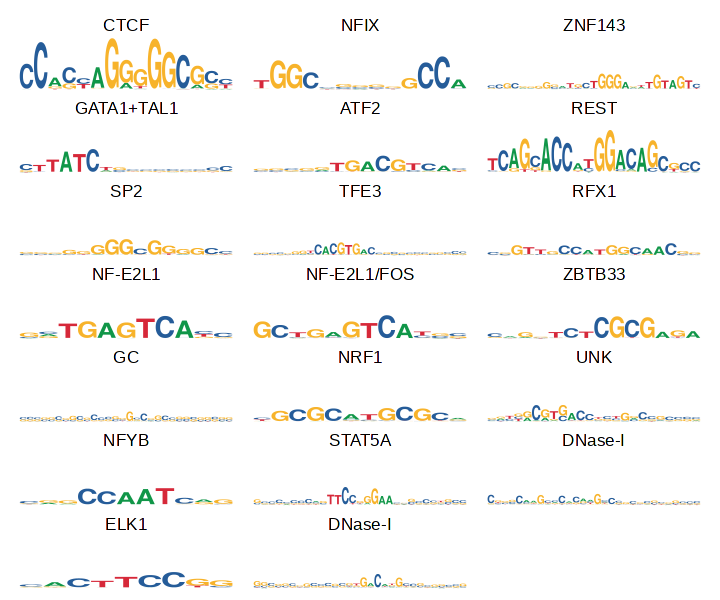

In [43]:


options(repr.plot.width = 6, repr.plot.height = 5)

atac_annotations = read.table("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/uncorrected_model_08.31.2022_filters_512_dil_8/profile_annotations_chip_annotated.csv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

#profile_annotations = atac_annotations
all_plots = get_plots("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/uncorrected_model_08.31.2022_filters_512_dil_8/profile_0_%d.pfm", seq(0,19), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F)
#do.call(gridExtra::grid.arrange, c(all_plots, ncol=1))

wrap_plots(all_plots, ncol=3, byrow=FALSE)

#ggsave("subfigs/modisco_plots/dnase_k562_profile_modisco.pdf", device = "pdf",  width = 8, height = 5, dpi = 300)

ggsave("subfigs/modisco_plots/dnase_k562_profile_modisco.pdf", device = "pdf",  width = 6, height = 6, dpi = 300)

In [44]:
atac_counts = read.table("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/uncorrected_model_08.31.2022_filters_512_dil_8/profile_counts.csv",sep=",", header=FALSE)

colnames(atac_counts) = c("key","counts")


In [45]:
new = merge(atac_annotations,atac_counts)[c("label", "counts")]

In [46]:
new_combined = aggregate(counts~.,new,FUN=sum)
new_combined["id"] = c(1)
new_combined["total"] = new_combined["counts"]*100/sum(new_combined["counts"])

new_combined = new_combined[new_combined["total"]>0.5,]
profile_annotations = new_combined

In [47]:
new_combined

,label,counts,id,total
,<chr>,<int>,<dbl>,<dbl>
1,ATF2,874,1,2.8382152
2,CTCF,6868,1,22.3030460
3,DNase-I,356,1,1.1560694
4,ELK1,1197,1,3.8871209
5,GATA1+TAL1,6333,1,20.5656946
6,GC,1590,1,5.1633435
8,NF-E2L1,3270,1,10.6189517
9,NF-E2L1/FOS,626,1,2.0328635
10,NFIX,1094,1,3.5526401


In [48]:
profile_annotations

,label,counts,id,total
,<chr>,<int>,<dbl>,<dbl>
1,ATF2,874,1,2.8382152
2,CTCF,6868,1,22.3030460
3,DNase-I,356,1,1.1560694
4,ELK1,1197,1,3.8871209
5,GATA1+TAL1,6333,1,20.5656946
6,GC,1590,1,5.1633435
8,NF-E2L1,3270,1,10.6189517
9,NF-E2L1/FOS,626,1,2.0328635
10,NFIX,1094,1,3.5526401


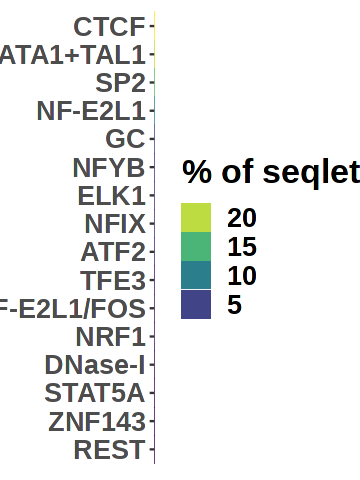

In [49]:
options(repr.plot.width = 3, repr.plot.height = 4)

p = ggplot(new_combined, aes(x=id, y=reorder(label, total)
, fill=total)) +
geom_tile() +
scale_fill_viridis_c() + 
theme(axis.ticks.x = element_blank(),
axis.text.x = element_blank(),
axis.title.y = element_blank(),
axis.title.x = element_blank(),
text = element_text(size=20, face="bold")) + guides(fill=guide_legend(title="% of seqlets", reverse=TRUE))

p

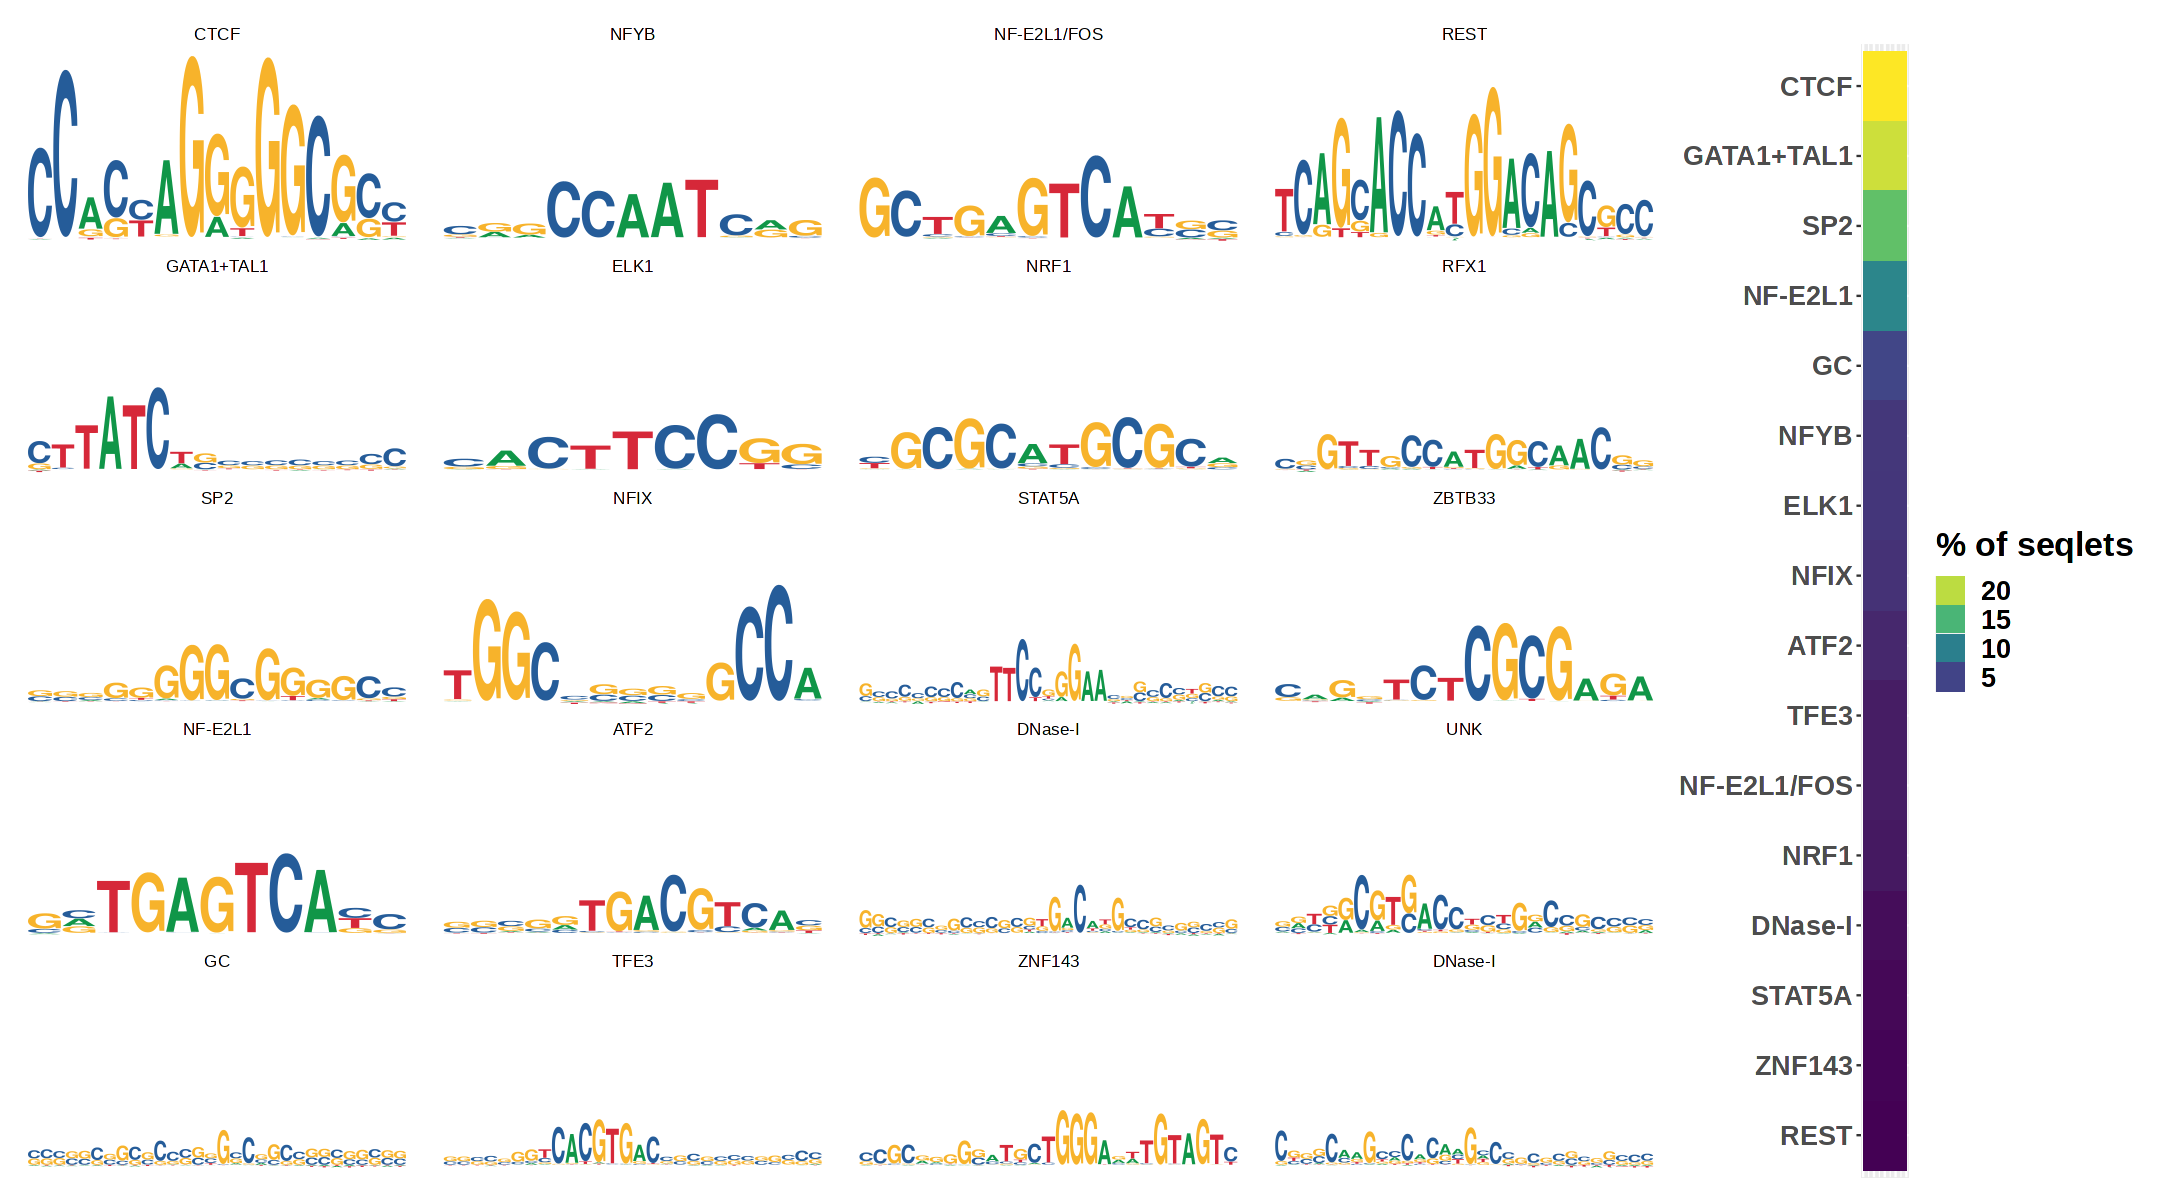

In [50]:
options(repr.plot.width = 18, repr.plot.height = 10)

wrap_plots(wrap_plots(all_plots, nrow=5, byrow=FALSE), p, widths=c(17.5,0.5))

#ggsave("subfigs/modisco_plots/k562_dnase_profile_modisco.pdf", device = "pdf",  width = 18, height = 11, dpi = 300)


[1] 0.062863
[1] -0.000775


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.053562
[1] -0.000501


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.030639
[1] -0.000208


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.04107
[1] -0.000142


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.04199
[1] -0.000284


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.040564
[1] -0.000503


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.042609
[1] -0.000705


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.047635
[1] -0.000254


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.027974
[1] -0.000102


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.040318
[1] -3.7e-05


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.031851
[1] -0.000302


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.03751
[1] -0.000423


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.032041
[1] -0.00036


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.03283
[1] -0.000413


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.050416
[1] -0.000102


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.044872
[1] -0.000311


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.026702
[1] -0.000583


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.070168
[1] -0.000989


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.025825
[1] -0.000484


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.026784
[1] -0.000189


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] 0.045936
[1] -0.000777


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


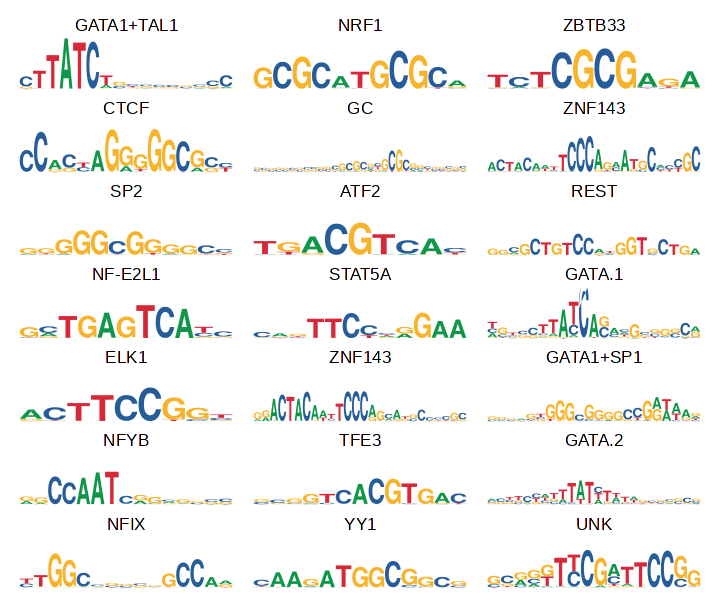

In [51]:



options(repr.plot.width = 6, repr.plot.height = 5)

atac_annotations = read.table("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/uncorrected_model_08.31.2022_filters_512_dil_8/counts_annotations_chip_annotated.csv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

#profile_annotations = atac_annotations
all_plots = get_plots("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/uncorrected_model_08.31.2022_filters_512_dil_8/counts_0_%d.pfm", seq(0,20), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F)
#do.call(gridExtra::grid.arrange, c(all_plots, ncol=1))

wrap_plots(all_plots, ncol=3, byrow=FALSE)

#ggsave("subfigs/modisco_plots/dnase_k562_profile_modisco.pdf", device = "pdf",  width = 8, height = 5, dpi = 300)

ggsave("subfigs/modisco_plots/dnase_k562_counts_modisco.pdf", device = "pdf",  width = 6, height = 6, dpi = 300)



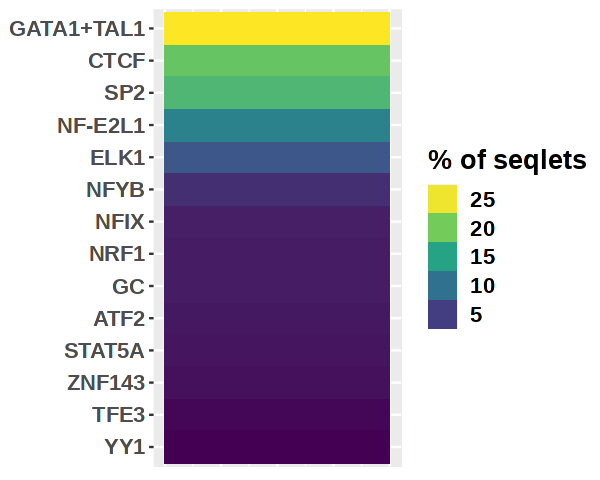

In [52]:
atac_counts = read.table("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/uncorrected_model_08.31.2022_filters_512_dil_8/counts_counts.csv",sep=",", header=FALSE)

colnames(atac_counts) = c("key","counts")


new = merge(atac_annotations,atac_counts, all=FALSE)[c("label", "counts")]

new_combined = aggregate(counts~.,new,FUN=sum)
new_combined["id"] = c(1)
new_combined["total"] = new_combined["counts"]*100.0/sum(new_combined["counts"])

new_combined = new_combined[new_combined["total"]>0.5,]
count_annotations = new_combined

#print(new_combined)
options(repr.plot.width = 5, repr.plot.height = 4)

p = ggplot(new_combined, aes(x=id, y=reorder(label, total), fill=total)) +
geom_tile() +
scale_fill_viridis_c() + 
theme(axis.ticks.x = element_blank(),
axis.text.x = element_blank(),
axis.title.y = element_blank(),
axis.title.x = element_blank(),
text = element_text(size=16, face="bold")) + guides(fill=guide_legend(title="% of seqlets", reverse=TRUE))

p

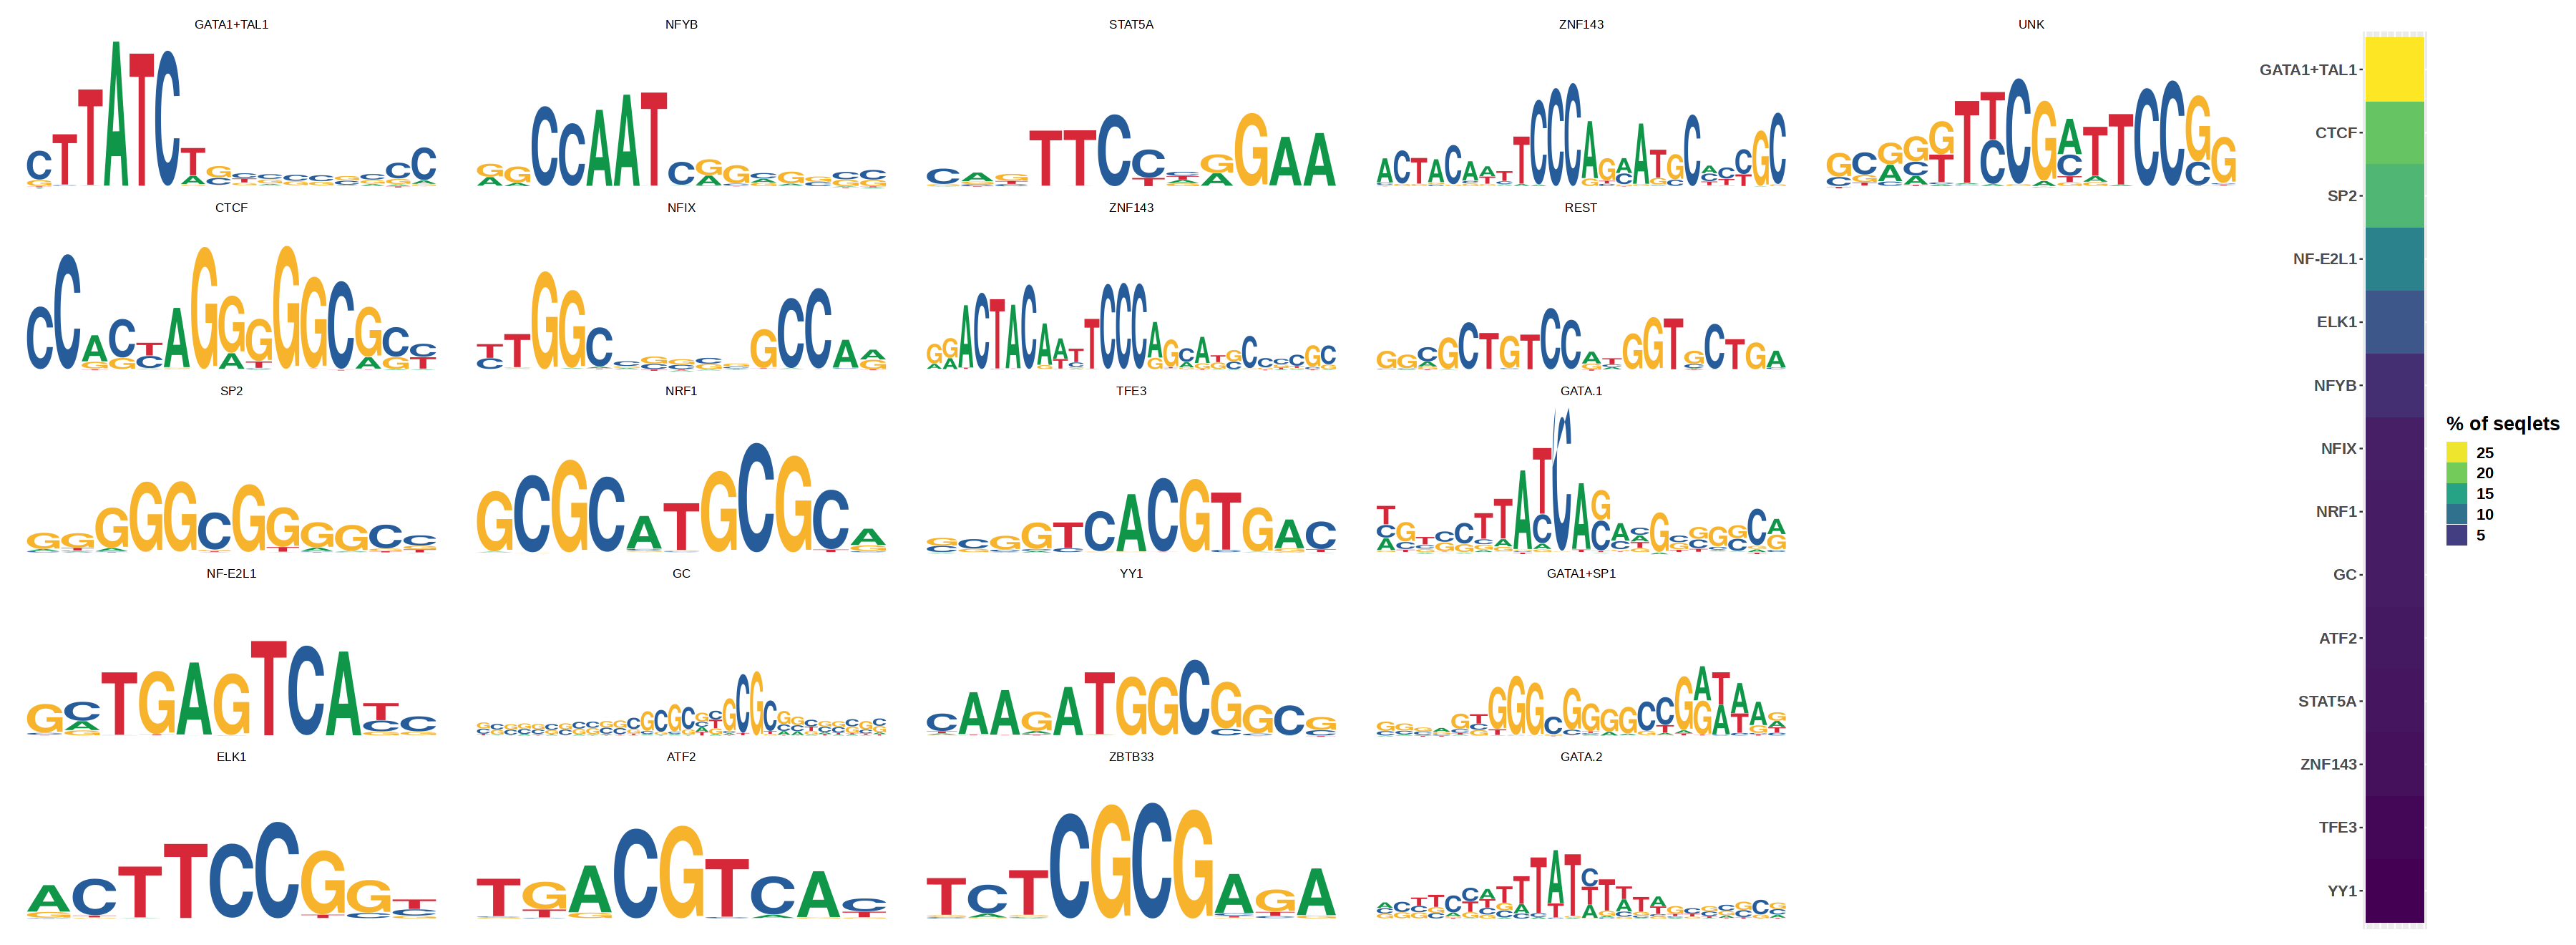

In [53]:
options(repr.plot.width = 30, repr.plot.height = 11)

wrap_plots(wrap_plots(all_plots, nrow=5, byrow=FALSE), p, widths=c(17.5,0.5))

#ggsave("subfigs/modisco_plots/k562_dnase_counts_modisco.pdf", device = "pdf",  width = 18, height = 11, dpi = 300)


In [54]:
count_annotations["source"] = "counts"
profile_annotations["source"] = "profile"

In [55]:
merged = rbind(count_annotations,profile_annotations)

In [56]:
count_annotations

,label,counts,id,total,source
,<chr>,<int>,<dbl>,<dbl>,<chr>
1,ATF2,520,1,1.9538589,counts
2,CTCF,5082,1,19.0952130,counts
3,ELK1,1971,1,7.4058766,counts
7,GATA1+TAL1,6824,1,25.6406403,counts
8,GC,584,1,2.1943338,counts
9,NF-E2L1,3093,1,11.6217029,counts
10,NFIX,643,1,2.4160216,counts
11,NFYB,982,1,3.6897873,counts
12,NRF1,584,1,2.1943338,counts


In [57]:
profile_annotations

,label,counts,id,total,source
,<chr>,<int>,<dbl>,<dbl>,<chr>
1,ATF2,874,1,2.8382152,profile
2,CTCF,6868,1,22.3030460,profile
3,DNase-I,356,1,1.1560694,profile
4,ELK1,1197,1,3.8871209,profile
5,GATA1+TAL1,6333,1,20.5656946,profile
6,GC,1590,1,5.1633435,profile
8,NF-E2L1,3270,1,10.6189517,profile
9,NF-E2L1/FOS,626,1,2.0328635,profile
10,NFIX,1094,1,3.5526401,profile


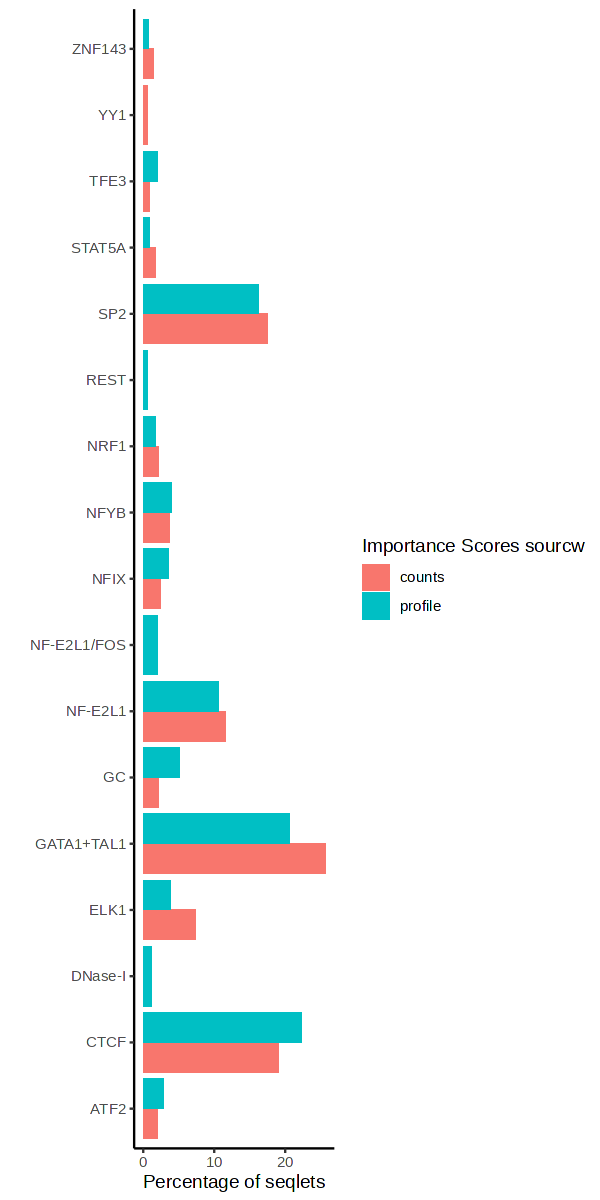

In [58]:
options(repr.plot.width = 5, repr.plot.height = 10)

ggplot(data = merged,
       mapping = aes(x = label, y = total, fill = source)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  labs(x = "", y = "Percentage of seqlets", fill = "Importance Scores sourcw") +
  theme_classic()

In [59]:
library(ggpubr)

merged_new=merge(x = count_annotations, y = profile_annotations, by = "label", all = TRUE)
merged_new[is.na(merged_new)] <- 0 
#ggballoonplot(merged, fill = "total")

In [60]:
merged_new2 = data.frame(counts=merged_new["total.x"],profile=merged_new["total.y"])

In [61]:
colnames(merged_new2) = c("counts","profile")

In [62]:
rownames(merged_new2) <- merged_new$label


In [63]:
merged_new2

,counts,profile
,<dbl>,<dbl>
ATF2,1.9538589,2.8382152
CTCF,19.0952130,22.3030460
DNase-I,0.0000000,1.1560694
ELK1,7.4058766,3.8871209
GATA1+TAL1,25.6406403,20.5656946
GC,2.1943338,5.1633435
NF-E2L1,11.6217029,10.6189517
NF-E2L1/FOS,0.0000000,2.0328635
NFIX,2.4160216,3.5526401


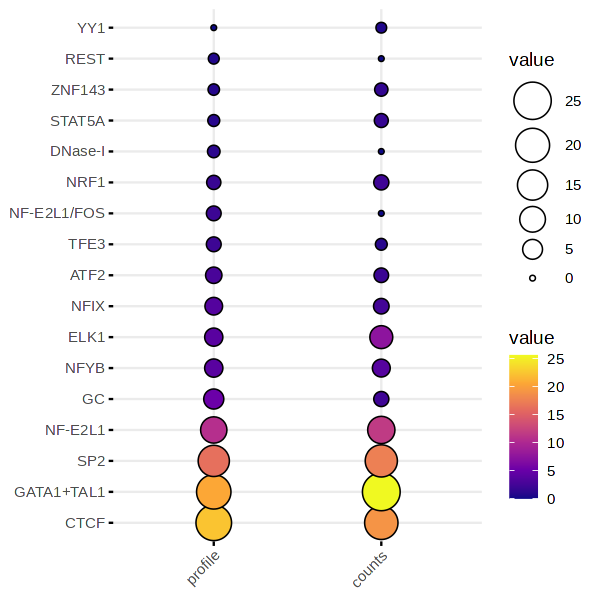

In [64]:
options(repr.plot.width = 5, repr.plot.height = 5)

MotifNames = rownames(merged_new2)[order(merged_new2$profile, decreasing=TRUE)]

ggballoonplot(merged_new2, fill = "value")+
  scale_fill_viridis_c(option = "C") + scale_y_discrete(limits = MotifNames) + scale_x_discrete(limits = c("profile", "counts"))
ggsave("subfigs/modisco_plots/dnase_counts_profile_freq.pdf", device = "pdf",  width = 5, height = 5, dpi = 300)


[1] "GATA+TAL"  "CTCF"      "SP1"       "BACH"      "ELK"       "NFYB"     
 [7] "NFIC"      "GC"        "NRF1"      "FOSB+JUNB" "STAT1"     "ZN143"    
[13] "BHLH"      "TYY1"      "DNase-I"   "NF2L2"     "REST"      "ZNF76"